<a href="https://colab.research.google.com/github/devikamsba2024/Deep_Learning/blob/main/CIFAR10_LENET_ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models,regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import numpy as np

##Lenet-5

**Loaded data from keras, and printed sample images**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 dataset loaded.
Training set shape: (50000, 32, 32, 3) (50000, 1)
Test set shape: (10000, 32, 32, 3) (10000, 1)


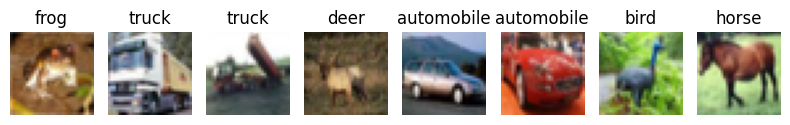

In [ ]:


# 1) Load CIFAR-10 dataset (automatically downloaded if not present)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


print("CIFAR-10 dataset loaded.")
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# 2) Classes in CIFAR-10
classes = ['airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 3) Plot a few images from the training set
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(x_train[i])
    label = y_train[i][0]  # y_train is shape (50000, 1)
    plt.title(classes[label])
    plt.axis('off')

plt.tight_layout()
plt.show()


**Normalized the data to so that the pixel intensities are scaled from [0, 255] to [0.0, 1.0]**

In [ ]:
# Convert from uint8 [0, 255] -> float32 [0, 1.0]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# CIFAR-10 labels are in shape (num_samples, 1); flatten them for Keras if needed
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)

**Created the lenet-5 model with average pooling. Initially i tried with tanh function to explore which gave me accuracy around 55 then i changed to relu.**

In [ ]:
# Create the model
model_lenet = models.Sequential()

# 1) First Convolutional layer
#    - 6 filters, 5x5 kernel, padding='same' to keep 32x32
#    - activation='tanh'
model_lenet.add(layers.Conv2D(filters=6, kernel_size=(5, 5), padding='same',
                        activation='relu', input_shape=(32, 32, 3)))

# 2) Average Pooling layer
model_lenet.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# This reduces spatial dims from 32x32 -> 16x16

# 3) Second Convolutional layer
#    - 16 filters, 5x5 kernel, padding='same' to keep 16x16
#    - activation='tanh'
model_lenet.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'))

# 4) Average Pooling layer
model_lenet.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# This reduces spatial dims from 16x16 -> 8x8

# 5) Flatten
model_lenet.add(layers.Flatten())

# 6) Fully connected (Dense) layer with 120 units
model_lenet.add(layers.Dense(120, activation='relu'))

# 7) Fully connected (Dense) layer with 84 units
model_lenet.add(layers.Dense(84, activation='relu'))

# 8) Output layer with 10 units (CIFAR-10) and softmax activation
model_lenet.add(layers.Dense(10, activation='softmax'))

# Print a summary of the model
model_lenet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 8, 8, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       123,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,886 (534.71 KB)

 Trainable params: 136,886 (534.71 KB)

 Non-trainable params: 0 (0.00 B)

**compiled and trained with a learning rate of 0.001, epochs as 10 where i have seen good performance **

In [ ]:
# Compile the model
model_lenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model_lenet.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3068 - loss: 1.8883 - val_accuracy: 0.4546 - val_loss: 1.4903
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4856 - loss: 1.4186 - val_accuracy: 0.5292 - val_loss: 1.2981
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5496 - loss: 1.2598 - val_accuracy: 0.5826 - val_loss: 1.1938
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5885 - loss: 1.1537 - val_accuracy: 0.6120 - val_loss: 1.1091
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6220 - loss: 1.0744 - val_accuracy: 0.6284 - val_loss: 1.0506
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6428 - loss: 1.0044 - val_accuracy: 0.6392 - val_loss: 1.0400
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6639 - loss: 0.9445 - val_accuracy: 0.6410 - val_loss: 1.0300
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6825 - loss: 0.8976 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model_lenet.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 1.0810701847076416
Test accuracy: 0.6366000175476074


**Loaded the dataset again to implement alexnet**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


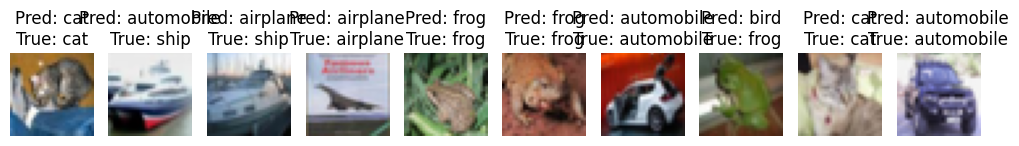

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Classes in CIFAR-10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Predict on a small batch
num_images_to_show = 10
x_sample = x_test[:num_images_to_show]
y_sample = y_test[:num_images_to_show]

predictions = model_lenet.predict(x_sample)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_sample[i])
    plt.axis('off')
    plt.title(f"Pred: {classes[pred_classes[i]]}\nTrue: {classes[y_sample[i]]}")
plt.tight_layout()
plt.show()


**Normalized the data to so that the pixel intensities are scaled from [0, 255] to [0.0, 1.0]**

In [ ]:


# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Convert data type
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# Flatten label arrays if needed (model depends on how you define the loss)
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000,)



*   Created a model with “small” AlexNet variant that keeps the same convolution structure but adapts kernel sizes and strides to 32*32
*   Used Batch Normalization to boost the performance
*   5 convolutional layers and 3 fully connected layers
* observed substantial difference in training loss and test loss so Added weight decay 1e‑4 to every trainable layer.



In [ ]:
weight_decay = 1e-4
L2 = regularizers.l2(weight_decay)   # convenience alias

def build_small_alexnet(input_shape=(32, 32, 3), num_classes=10):
    return models.Sequential([
        # Block 1
        layers.Conv2D(64, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=L2, use_bias=False, input_shape=input_shape),
        layers.BatchNormalization(), layers.Activation("relu"),

        layers.Conv2D(128, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=L2, use_bias=False),
        layers.BatchNormalization(), layers.Activation("relu"),
        layers.MaxPooling2D(2),

        # Block 2
        layers.Conv2D(256, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=L2, use_bias=False),
        layers.BatchNormalization(), layers.Activation("relu"),

        layers.Conv2D(256, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=L2, use_bias=False),
        layers.BatchNormalization(), layers.Activation("relu"),
        layers.MaxPooling2D(2),

        # Block 3
        layers.Conv2D(256, 3, padding="same", kernel_initializer="he_normal",
                      kernel_regularizer=L2, use_bias=False),
        layers.BatchNormalization(), layers.Activation("relu"),
        layers.MaxPooling2D(2),

        # Fully‑connected part
        layers.Flatten(),
        layers.Dense(128, kernel_initializer="he_normal",
                     kernel_regularizer=L2, use_bias=False),
        layers.BatchNormalization(), layers.Activation("relu"),
        layers.Dropout(0.5),

        layers.Dense(64, kernel_initializer="he_normal",
                     kernel_regularizer=L2, use_bias=False),
        layers.BatchNormalization(), layers.Activation("relu"),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax",
                     kernel_regularizer=L2)
    ])

model_alex_net = build_small_alexnet()
model_alex_net.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 256)    │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 128)            │             

 Total params: 2,087,754 (7.96 MB)

 Trainable params: 2,085,450 (7.96 MB)

 Non-trainable params: 2,304 (9.00 KB)


* Used a learning‑rate decay: start 1e‑3 → 1e‑4 at epoch 10 → 1e‑5 at epoch 15.
* Observed some improvement after adding weight decay and learning rate decay

In [ ]:

def lr_schedule(epoch, lr):
    if epoch < 10:   # 0‑9
        return 1e-3
    elif epoch < 15: # 10‑14
        return 1e-4
    else:            # 15‑19
        return 1e-5

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

Trained Model with 64 batch size and 20 epochs

In [ ]:
model_alex_net.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # initial lr overridden by scheduler after epoch 0
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model_alex_net.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.10,
    callbacks=[lr_callback],
    verbose=1
)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.3289 - loss: 2.1455 - val_accuracy: 0.6118 - val_loss: 1.3143 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.6109 - loss: 1.3732 - val_accuracy: 0.6550 - val_loss: 1.2261 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.6872 - loss: 1.1615 - val_accuracy: 0.6594 - val_loss: 1.2157 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7348 - loss: 1.0566 - val_accuracy: 0.6670 - val_loss: 1.2393 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy

**Evaluation results**

In [ ]:

# ─────────────────── 5. evaluate ───────────────────
test_loss, test_acc = model_alex_net.evaluate(x_test, y_test, verbose=0)
print(f"\nTest loss: {test_loss:.4f}   |   Test accuracy: {test_acc:.4f}")


Test loss: 0.6955   |   Test accuracy: 0.8834


* To check which classes got misclassified printing confusion metrics

* To see performance across different classes across both models printing the results here






==========  LeNet‑5  ==========
              precision    recall  f1-score   support

    airplane     0.7280    0.6610    0.6929      1000
  automobile     0.8649    0.5890    0.7008      1000
        bird     0.4803    0.6220    0.5420      1000
         cat     0.4458    0.4980    0.4705      1000
        deer     0.5792    0.6000    0.5894      1000
         dog     0.4966    0.5900    0.5393      1000
        frog     0.7609    0.6300    0.6893      1000
       horse     0.7719    0.6970    0.7325      1000
        ship     0.7392    0.8050    0.7707      1000
       truck     0.7058    0.6740    0.6895      1000

    accuracy                         0.6366     10000
   macro avg     0.6573    0.6366    0.6417     10000
weighted avg     0.6573    0.6366    0.6417     10000



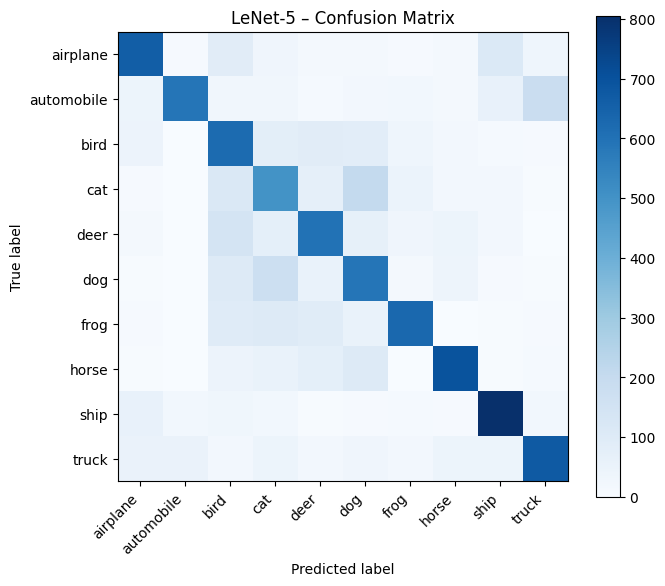


==========  AlexNet  ==========
              precision    recall  f1-score   support

    airplane     0.8626    0.9040    0.8828      1000
  automobile     0.9447    0.9400    0.9424      1000
        bird     0.8415    0.8280    0.8347      1000
         cat     0.7854    0.7720    0.7786      1000
        deer     0.8701    0.8840    0.8770      1000
         dog     0.8295    0.8270    0.8282      1000
        frog     0.9168    0.9140    0.9154      1000
       horse     0.9211    0.9110    0.9160      1000
        ship     0.9327    0.9280    0.9303      1000
       truck     0.9297    0.9260    0.9279      1000

    accuracy                         0.8834     10000
   macro avg     0.8834    0.8834    0.8833     10000
weighted avg     0.8834    0.8834    0.8833     10000



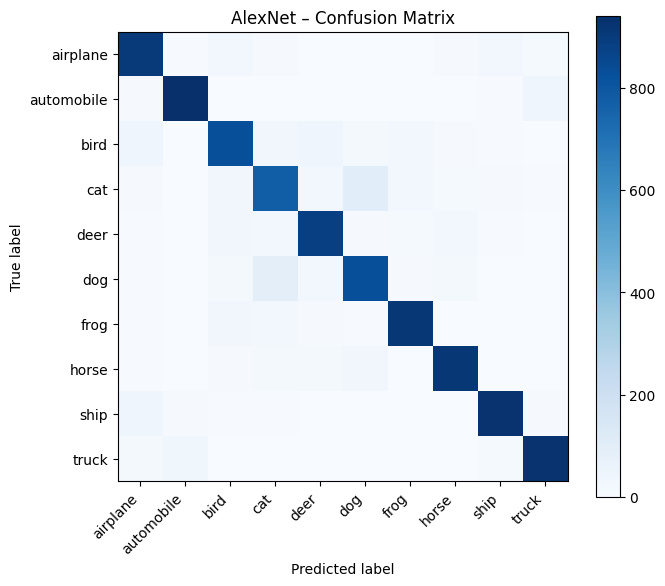

In [ ]:


# CIFAR‑10 class names
classes = ['airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def evaluate_model(model, x, y, name="Model"):
    """
    Prints precision/recall/F1 and plots a confusion matrix.
    Returns the confusion‑matrix array.
    """
    # 1) Predict
    y_pred = np.argmax(model.predict(x, batch_size=256, verbose=0), axis=1)

    # 2) Text report
    print(f"\n{'='*10}  {name}  {'='*10}")
    print(classification_report(y, y_pred, target_names=classes, digits=4))

    # 3) Confusion matrix
    cm = confusion_matrix(y, y_pred)

    # 4) Plot
    plt.figure(figsize=(7, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name} – Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

    return cm

# -----  Run for both networks  -----
cm_lenet = evaluate_model(model_lenet, x_test, y_test, name="LeNet‑5")
cm_alex  = evaluate_model(model_alex_net,  x_test, y_test, name="AlexNet")
